**1**<br>Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [160]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

$\large b = \frac{n \sum_{i=1}^n{x_iy_i} - (\sum_{i=1}^n{x_i})(\sum_{i=1}^n{y_i})}{n\sum_{i=1}^n{x_i^2} - (\sum_{i=1}^n{x_i})^2} \qquad a = \bar{y} - b\bar{x}$

In [112]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X) ** 2)
b

2.620538882402765

In [113]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

$\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{pmatrix} = 
\begin{pmatrix}
x_1\\
x_2\\
...\\
x_n\\
\end{pmatrix}\begin{pmatrix}
 \\
\beta_1 \\
\\
\end{pmatrix}$

In [175]:
# Без смещения intercept
X = X.reshape(n, 1)
y = y.reshape(n, 1)
ab = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
ab

array([[5.88982042]])

$\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{pmatrix} = 
\begin{pmatrix}
1 & x_1\\
1 & x_2\\
...&...\\
1 & x_n\\
\end{pmatrix}\begin{pmatrix}
 \\
\beta_0 \\
\beta_1 \\
\\
\end{pmatrix}$

In [115]:
# Со смещением intercept
X = np.hstack([np.ones((n, 1)), X])
y = y.reshape(n, 1)
ab = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
ab

array([[444.17735732],
       [  2.62053888]])

**2**<br>
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [128]:
def calc_mse(n, X, y, b1):
    return np.sum((b1*X-y)**2)/n 

In [137]:
b1 = 0.01; alpha=1e-8
for i in range(10_000):
    b1 -= alpha * (2/n) * np.sum((b1*X-y)*X)
    if i % 1000 == 0:
        print(f'Itearion: {i}, mse={calc_mse(n, X, y, b1)}')

Itearion: 0, mse=1066951.0965967271
Itearion: 1000, mse=861708.3081996046
Itearion: 2000, mse=743433.160634889
Itearion: 3000, mse=675274.8071029342
Itearion: 4000, mse=635997.2306057666
Itearion: 5000, mse=613362.7634341442
Itearion: 6000, mse=600319.211620804
Itearion: 7000, mse=592802.6112689037
Itearion: 8000, mse=588471.0241629741
Itearion: 9000, mse=585974.8628695895


**3**<br>В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

*Если значение $\sigma$ генеральной выборки известно, то используется таблица Z-значений (значений функции Лапласа), если не известно - то по степени свободы (n-1) и вероятности $\alpha$ находится значение критерия в таблице Стьюдента*

***4**<br> Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [147]:
def calc_mse(n, X, y, b0, b1):
    return np.sum((b0+b1*X-y)**2)/n 

In [169]:
b0=0.1; b1 = 0.1; alpha=1e-6
mses = []
for i in range(1_000_000):
    pred = b0 + b1*X
    b0 -= alpha * (2/n) * np.sum(pred - y)
    b1 -= alpha * (2/n) * np.sum((pred - y)*X)
    mses.append(calc_mse(n, X, y, b0, b1))
    if i % 100000 == 0:
        print(f'Itearion: {i}, mse={calc_mse(n, X, y, b0, b1)}')

Itearion: 0, mse=493102.2473380378
Itearion: 100000, mse=51659.14446271713
Itearion: 200000, mse=47299.194496325494
Itearion: 300000, mse=43359.906132935954
Itearion: 400000, mse=39800.69262600216
Itearion: 500000, mse=36584.8831651681
Itearion: 600000, mse=33679.34505450296
Itearion: 700000, mse=31054.142344161064
Itearion: 800000, mse=28682.227398322644
Itearion: 900000, mse=26539.162221632003


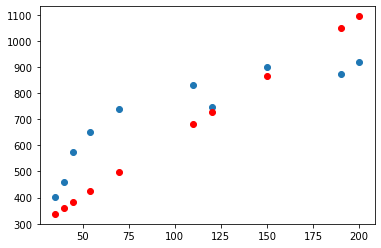

In [173]:
plt.scatter(X, y)
plt.scatter(X, pred, color='red');

In [174]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [171]:
pred

array([ 337.41133879,  383.29570013, 1048.61893959, 1094.50330093,
        360.35351946,  498.00660349,  424.59162534,  865.08149422,
        727.4284102 ,  681.54404886])